In [3]:
'''Loading in required libraries for code'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns

In [5]:
'''Loading in the train and testing data sets from kaggle'''

test_data = pd.read_csv('exoTrain.csv.zip')
train_data = pd.read_csv('exoTrain.csv.zip')

FileNotFoundError: [Errno 2] No such file or directory: 'exoTrain.csv.zip'

In [3]:
'''The Labels are 2 for exoplanet and 1 for non exoplanet so we have to switch them to 2->1 and 1->0'''

new_labels_test = []
for i in test_data['LABEL']:
    if i == 2:
        new_labels_test.append(1)
        
    if i == 1:
        new_labels_test.append(0)

test_data = test_data.drop(columns= ['LABEL'])
test_data.insert(0, 'NEW_LABEL', new_labels_test)

In [4]:
'''For both datasets'''

new_labels_train = []
for i in train_data['LABEL']:
    if i == 2:
        new_labels_train.append(1)
        
    if i == 1:
        new_labels_train.append(0)

train_data = train_data.drop(columns= ['LABEL'])
train_data.insert(0, 'NEW_LABEL', new_labels_train)

In [26]:
train_data

,NEW_LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [18]:
'''Remove outliers, shown by scatter plot; removed by IQR or another method'''

'Remove outliers, shown by scatter plot; removed by IQR or another method'

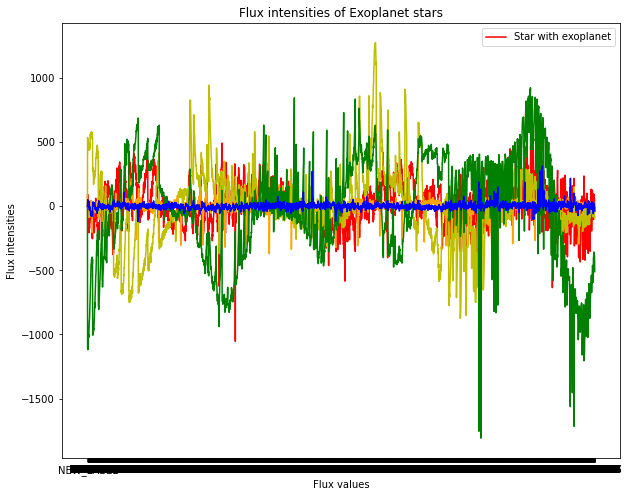

In [27]:
'''Observing the intensity of flux values from training data of exoplanets vs non exoplanets 5 of each'''

plt.figure(figsize = (10,8))
plt.title('Flux intensities of Exoplanet stars')

#Exoplanet ones
plt.plot(train_data.iloc[0,], color = 'r', label = 'Star with exoplanet')
plt.plot(train_data.iloc[1,], color = 'orange')
plt.plot(train_data.iloc[2,], color = 'y')
plt.plot(train_data.iloc[4,], color = 'g')
plt.plot(train_data.iloc[6,], color = 'b')

plt.xlabel('Flux values')
plt.ylabel('Flux intensities')
plt.legend()

plt.show()

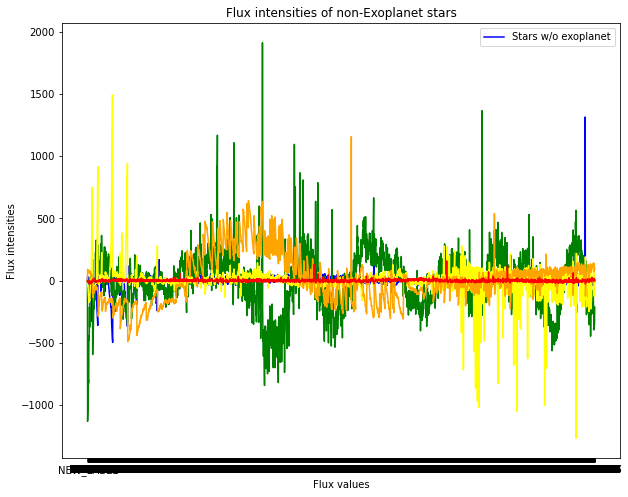

In [23]:
plt.figure(figsize = (10,8))
plt.title('Flux intensities of non-Exoplanet stars')

plt.plot(train_data.iloc[211,], color = 'b', label = 'Stars w/o exoplanet')
plt.plot(train_data.iloc[200,], color = 'g')
plt.plot(train_data.iloc[300,], color = 'yellow')
plt.plot(train_data.iloc[400,], color = 'orange')
plt.plot(train_data.iloc[500,], color = 'red')

plt.xlabel('Flux values')
plt.ylabel('Flux intensities')
plt.legend()

plt.show()

In [8]:
'''Splitting the data into labels and features for both training and testing sets'''

train_fluxes = train_data.drop(columns = ['NEW_LABEL'])

train_labels = train_data['NEW_LABEL']

test_fluxes = test_data.drop(columns = ['NEW_LABEL'])

test_labels = test_data['NEW_LABEL']

In [10]:
'''Normalizing the data'''

from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()

train_scaler.fit(train_fluxes) #for 
norm_train_fluxes = train_scaler.transform(train_fluxes)

test_scaler = MinMaxScaler()

test_scaler.fit(test_fluxes)
norm_test_fluxes = test_scaler.transform(train_fluxes)

In [15]:
'''Applying Guassian Filter'''

train_fluxes = ndimage.filters.gaussian_filter(norm_train_fluxes, sigma = 10)

test_fluxes = ndimage.filters.gaussian_filter(norm_test_fluxes, sigma = 10)

In [16]:
'''May need to apply feature scaler unsure at the moment'''

'May need to apply feature scaler unsure at the moment'

In [17]:
'''PCA on data'''



'PCA on data'